In [1]:
import pandas as pd
import duckdb
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 🔹 1. Charger les données
file_path = "../../data/raw/Classeur1.csv"
df = duckdb.query(f"""
    SELECT * FROM read_csv_auto('{file_path}', delim=';', header=True)
""").to_df()

In [5]:
# 🔹 2. Nettoyer les intitulés de poste
def clean_emp_title(title):
    if pd.isnull(title):
        return None
    title = title.lower()
    title = re.sub(r"[^a-z\s]", "", title)  # Enlever ponctuation, chiffres
    title = re.sub(r"\b\w{1,2}\b", "", title)  # Enlever mots très courts
    title = re.sub(r"\s+", " ", title)  # Normaliser les espaces
    return title.strip()

df['emp_title_clean'] = df['emp_title'].apply(clean_emp_title)

In [6]:
# 🔹 3. Catégorisation des intitulés nettoyés
def categorize_title(title):
    if pd.isnull(title):
        return "Autre"
    if any(keyword in title for keyword in ["teacher", "professor", "educat"]):
        return "Éducation"
    elif any(keyword in title for keyword in ["nurse", "doctor", "medical", "health"]):
        return "Santé"
    elif any(keyword in title for keyword in ["driver", "delivery", "transport", "truck"]):
        return "Transport"
    elif any(keyword in title for keyword in ["accountant", "finance", "bank", "auditor"]):
        return "Finance"
    elif any(keyword in title for keyword in ["manager", "director", "chief", "officer"]):
        return "Management"
    elif any(keyword in title for keyword in ["engineer", "technician", "developer", "architect"]):
        return "Technique"
    elif any(keyword in title for keyword in ["sales", "marketing", "business", "consultant"]):
        return "Commercial"
    elif any(keyword in title for keyword in ["clerk", "assistant", "admin", "secretary"]):
        return "Administratif"
    elif any(keyword in title for keyword in ["student", "intern", "trainee"]):
        return "Junior / Étudiant"
    elif any(keyword in title for keyword in ["retired", "unemployed", "none"]):
        return "Sans emploi / Retraité"
    else:
        return "Autre"

df['emp_category'] = df['emp_title_clean'].apply(categorize_title)

In [7]:
# 🔹 4. Statistiques avant/après
top_raw = df['emp_title'].value_counts().head(20)
top_clean = df['emp_title_clean'].value_counts().head(20)
top_cat = df['emp_category'].value_counts()

C:\Users\Pierre\AppData\Local\Temp\ipykernel_26188\2496662274.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_raw.index, x=top_raw.values, ax=axes[0], palette="magma")
C:\Users\Pierre\AppData\Local\Temp\ipykernel_26188\2496662274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_clean.index, x=top_clean.values, ax=axes[1], palette="viridis")
C:\Users\Pierre\AppData\Local\Temp\ipykernel_26188\2496662274.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cat.index, x=top_cat.values, ax=axes[2], palette="Set2")


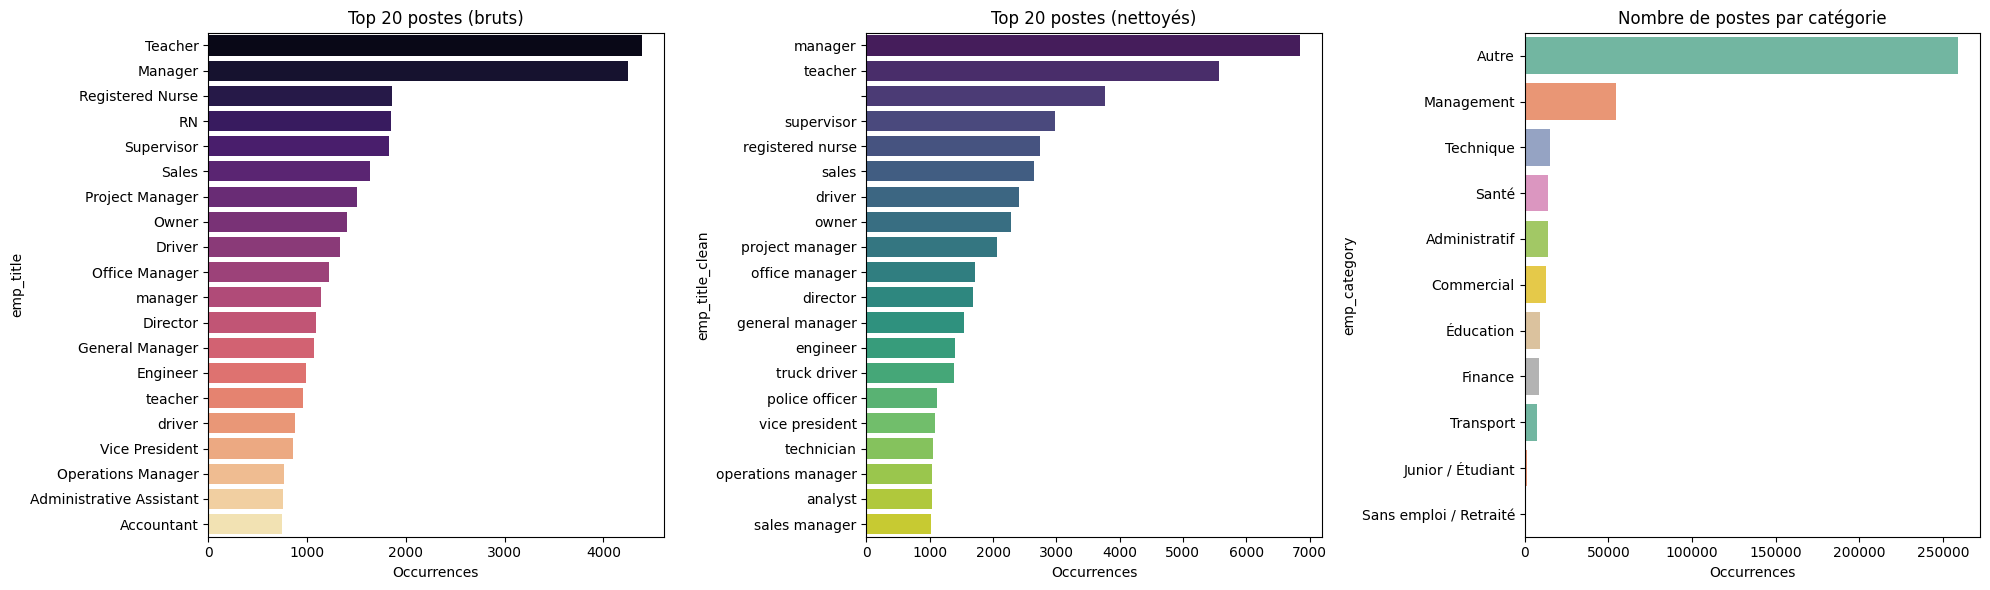

In [8]:
# 🔹 5. Visualisation
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(y=top_raw.index, x=top_raw.values, ax=axes[0], palette="magma")
axes[0].set_title("Top 20 postes (bruts)")
axes[0].set_xlabel("Occurrences")

sns.barplot(y=top_clean.index, x=top_clean.values, ax=axes[1], palette="viridis")
axes[1].set_title("Top 20 postes (nettoyés)")
axes[1].set_xlabel("Occurrences")

sns.barplot(y=top_cat.index, x=top_cat.values, ax=axes[2], palette="Set2")
axes[2].set_title("Nombre de postes par catégorie")
axes[2].set_xlabel("Occurrences")

plt.tight_layout()
plt.show()